<a href="https://colab.research.google.com/github/lokidiffender/Virginia_School_Data_Anaylysis_Report/blob/main/Virginia_School_dataset_ML__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --pre pycaret

In [ ]:
#importing libraries for performing data maipulations and applying stats on it.
import numpy as np
import pandas as pd

In [ ]:
# Importing the dataset


url="https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/Virginia%20Schools%202021.csv"

data  = pd.read_csv(url)


# Displaying the data
data

,Rank,School,School URL,District,District URL,Address,City,City URL,Zip,County,...,Student/Teacher Ratio,Percent Free/Disc Lunch,Percent African American,Percent American Indian,Percent Asian,Percent Hispanic,Percent Pacific Islander,Percent Two or More Races,Percent White,Standard Score
0,1,Kilmer Center,https://www.schooldigger.com/go/VA/schools/012...,Fairfax County Public Schools,https://www.schooldigger.com/go/VA/district/01...,8102 Wolftrap Rd,Vienna,https://www.schooldigger.com/go/VA/city/Vienna...,22182,Fairfax County,...,4.6,0.35,0.10,0.00,0.20,0.25,0.0,0.07,0.38,94.1
1,2,Thomas Jefferson,https://www.schooldigger.com/go/VA/schools/012...,Fairfax County Public Schools,https://www.schooldigger.com/go/VA/district/01...,6560 Braddock Rd,Alexandria,https://www.schooldigger.com/go/VA/city/Alexan...,22312,Fairfax County,...,17.5,0.02,0.02,0.00,0.70,0.02,0.0,0.05,0.21,89.1
2,3,Open,https://www.schooldigger.com/go/VA/schools/032...,Richmond City Public Schools,https://www.schooldigger.com/go/VA/district/03...,600 S Pine St,Richmond,https://www.schooldigger.com/go/VA/city/Richmo...,23220,Richmond city,...,13.5,0.99,0.35,0.01,0.03,0.10,0.0,0.04,0.50,84.1
3,4,Richmond Community,https://www.schooldigger.com/go/VA/schools/032...,Richmond City Public Schools,https://www.schooldigger.com/go/VA/district/03...,201 E Brookland Park Boulevard,Richmond,https://www.schooldigger.com/go/VA/city/Richmo...,23222,Richmond city,...,12.2,0.99,0.70,0.00,0.01,0.06,0.0,0.03,0.20,83.4
4,5,Grassfield,https://www.schooldigger.com/go/VA/schools/008...,Chesapeake City Public Schools,https://www.schooldigger.com/go/VA/district/00...,2007 Grizzly Trail,Chesapeake,https://www.schooldigger.com/go/VA/city/Chesap...,23323,Chesapeake city,...,17.3,0.12,0.15,0.01,0.04,0.10,0.0,0.08,0.63,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,Armstrong,https://www.schooldigger.com/go/VA/schools/032...,Richmond City Public Schools,https://www.schooldigger.com/go/VA/district/03...,2300 Cool Lane,Richmond,https://www.schooldigger.com/go/VA/city/Richmo...,23223,Richmond city,...,13.1,0.97,0.95,0.00,0.00,0.01,0.0,0.01,0.03,6.1
323,324,Huguenot,https://www.schooldigger.com/go/VA/schools/032...,Richmond City Public Schools,https://www.schooldigger.com/go/VA/district/03...,7945 Forest Hill Ave,Richmond,https://www.schooldigger.com/go/VA/city/Richmo...,23225,Richmond city,...,15.7,1.00,0.64,0.00,0.01,0.27,0.0,0.01,0.08,2.5
324,325,George Wythe,https://www.schooldigger.com/go/VA/schools/032...,Richmond City Public Schools,https://www.schooldigger.com/go/VA/district/03...,4314 Crutchfield St,Richmond,https://www.schooldigger.com/go/VA/city/Richmo...,23225,Richmond city,...,13.1,1.00,0.57,0.00,0.01,0.38,0.0,0.01,0.03,0.7
325,326,Bryant,https://www.schooldigger.com/go/VA/schools/012...,Fairfax County Public Schools,https://www.schooldigger.com/go/VA/district/01...,2709 Popkins Ln,Alexandria,https://www.schooldigger.com/go/VA/city/Alexan...,22306,Fairfax County,...,10.9,0.40,0.17,0.01,0.10,0.65,0.0,0.01,0.08,0.5


In [ ]:
#looking the data columns from the virginia school dataset
data.columns

Index(['Rank', 'School', 'School URL', 'District', 'District URL', 'Address',
       'City', 'City URL', 'Zip', 'County', 'Phone', 'Is Title I',
       'Is Charter', 'Is Magnet', 'Is Virtual', 'Number Students',
       'Number Full-time Teachers', 'Student/Teacher Ratio',
       'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White', 'Standard Score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       327 non-null    int64  
 1   School                     327 non-null    object 
 2   School URL                 327 non-null    object 
 3   District                   327 non-null    object 
 4   District URL               327 non-null    object 
 5   Address                    327 non-null    object 
 6   City                       327 non-null    object 
 7   City URL                   327 non-null    object 
 8   Zip                        327 non-null    int64  
 9   County                     327 non-null    object 
 10  Phone                      327 non-null    object 
 11  Is Title I                 327 non-null    object 
 12  Is Charter                 327 non-null    object 
 13  Is Magnet                  327 non-null    object 

In [ ]:
#creating a target variable 'Y' with standard score of the dataset.
y="Standard Score"
# Setting the noise/redundant variables & variables with more than 20% missing data
ignored_cols = ['Rank','School', 'School URL',  'District URL',  'City URL',
      'Phone', 'Home Prices Ranking', 'Address']

In [ ]:
categorical_cols=['District', 'City',
       'Zip', 'County', 'Is Title I', 'Is Charter', 'Is Magnet',
       'Is Virtual']

In [ ]:
numerical_cols=['Number Students',
       'Number Full-time Teachers', 'Student/Teacher Ratio',
       'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White']

In [ ]:
from pycaret.regression import *

In [ ]:
#creating the ML model
# Code snippet 9
# Setting/configuring the pycaret ML experiment
regression_setup = setup(data,
                         target = y,
                         categorical_features = categorical_cols,
                         numeric_features = numerical_cols,
                         ignore_features = ignored_cols)

,Description,Value
0,Session id,6394
1,Target,Standard Score
2,Target type,Regression
3,Original data shape,"(327, 27)"
4,Transformed data shape,"(327, 20)"
5,Transformed train set shape,"(228, 20)"
6,Transformed test set shape,"(99, 20)"
7,Ignore features,8
8,Ordinal features,3
9,Numeric features,11


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,13.1235,273.6562,16.2608,0.1609,0.4818,0.8940,0.2810
gbr,Gradient Boosting Regressor,12.9532,277.1894,16.3572,0.1529,0.4554,0.7737,0.2720
ada,AdaBoost Regressor,13.0305,278.9884,16.4301,0.1445,0.4684,0.7921,0.3080
en,Elastic Net,13.3138,290.6225,16.8009,0.1134,0.4838,0.8754,0.1660
lr,Linear Regression,13.2219,289.4695,16.7499,0.1125,0.4764,0.8144,0.7910
et,Extra Trees Regressor,13.2316,290.7404,16.7815,0.1101,0.4739,0.7967,0.3070
ridge,Ridge Regression,13.3521,293.6082,16.8835,0.0973,0.4885,0.8305,0.1600
xgboost,Extreme Gradient Boosting,13.4548,295.0794,16.9095,0.0935,0.4768,0.8171,0.2640
br,Bayesian Ridge,13.3809,294.8342,16.9284,0.0928,0.4798,0.8328,0.1560
rf,Random Forest Regressor,13.6714,306.9713,17.2606,0.0565,0.4933,0.8613,0.3770


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=6394)

In [ ]:
#Building the model using the best algo from compare.models() function
model=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.7784,295.7782,17.1982,0.2482,0.7958,4.4672
1,14.6414,270.6460,16.4513,0.1934,0.4992,0.5531
2,9.3558,134.4437,11.5950,0.3871,0.3072,0.2703
3,12.9860,345.8799,18.5978,-0.1106,0.5171,0.5287
4,17.5326,482.0065,21.9546,-0.0045,0.5333,0.5225
5,16.4904,365.4823,19.1176,-0.3572,0.4749,0.5143
6,10.2064,161.0906,12.6921,0.4515,0.3597,0.3280
7,14.3348,285.4775,16.8961,0.4068,0.5897,1.0121
8,11.9724,215.6100,14.6837,0.0057,0.3859,0.3674


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Using the algo to predict values(Standard scores)
predicted_scores=predict_model(model,data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.8477,109.4769,10.4631,0.6703,0.3544,0.2459


In [ ]:
#downloading the predicted scores.
predicted_scores.to_csv("Virginia_Schools_Predicted_Scores.csv")

In [ ]:
#predicting standard scores for a client file
client_data=pd.read_csv('https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/Virgnia%20Client%20Data.csv')
client_predictions = predict_model(model, client_data)

In [ ]:
ignored_cols = ['Rank','School', 'School URL',  'District URL',  'City URL',
      'Phone', 'Home Prices Ranking', 'Address']

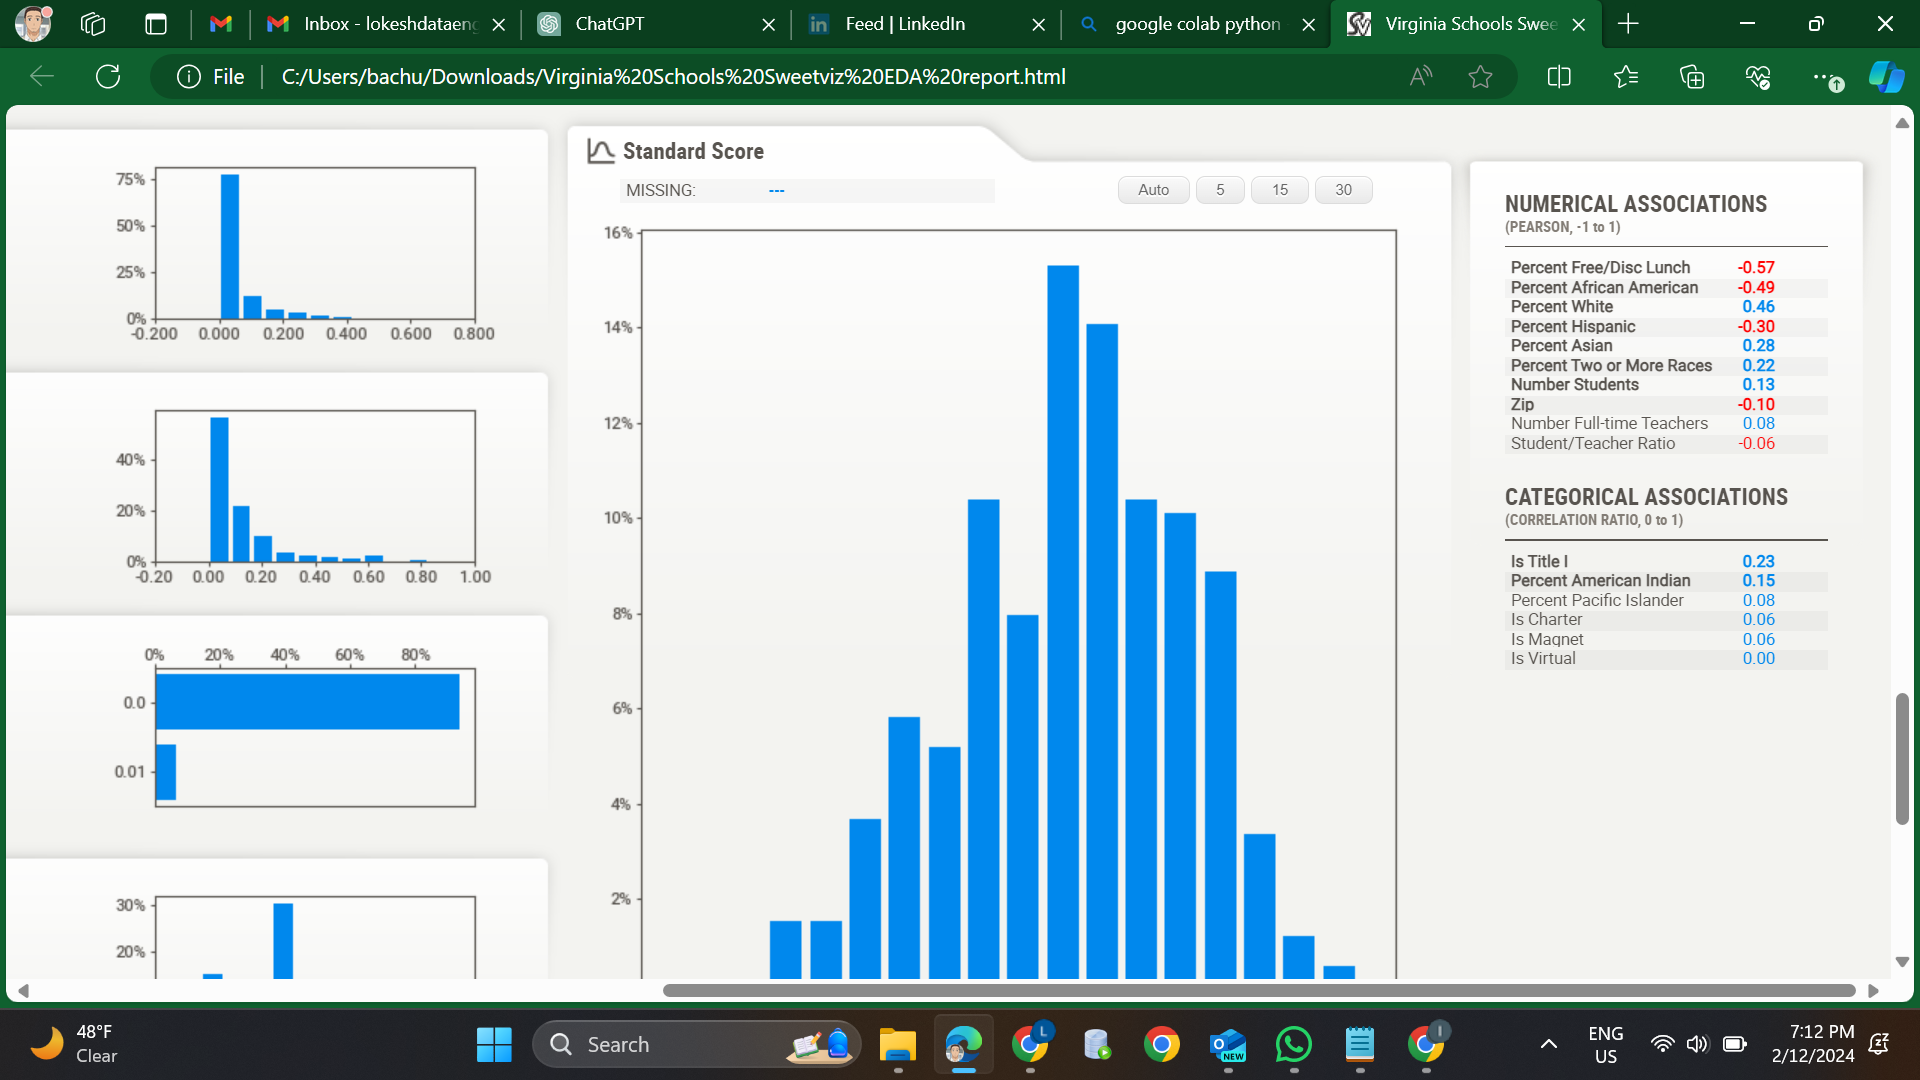

In [ ]:
#case-2
#Here I'm avoiding 'Is Virtual 'feature from the categorical values.
categorical_cols=['Is Title I','Percent American Indian','Percent Pacific Islander','Is Charter', 'Is Magnet']
numerical_cols=['Number Students',
       'Number Full-time Teachers', 'Student/Teacher Ratio',
       'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White']

In [ ]:
regression_setup = setup(data,
                         target = y,
                         categorical_features = categorical_cols,
                         numeric_features = numerical_cols,
                         ignore_features = ignored_cols)

,Description,Value
0,Session id,8473
1,Target,Standard Score
2,Target type,Regression
3,Original data shape,"(327, 27)"
4,Transformed data shape,"(327, 24)"
5,Transformed train set shape,"(228, 24)"
6,Transformed test set shape,"(99, 24)"
7,Ignore features,8
8,Ordinal features,4
9,Numeric features,11


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.4096,158.5124,12.1565,0.5156,0.4112,0.4720,0.2030
dummy,Dummy Regressor,15.1055,346.3927,18.4175,-0.0511,0.5761,1.2295,0.1160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=8473)

In [ ]:
#Building the model using the best algo from compare.models() function
model=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4362,133.5766,11.5575,0.5338,0.2887,0.2697
1,7.8067,92.9273,9.6399,0.7909,0.6912,2.0785
2,14.4696,312.4002,17.6748,0.2511,0.4750,0.4066
3,6.5803,64.1278,8.0080,0.6323,0.1668,0.1355
4,10.4423,256.9138,16.0285,0.3561,0.4862,0.4829
5,9.1849,165.2557,12.8552,0.5749,0.7536,0.2101
6,12.7847,262.3269,16.1965,0.1837,0.3229,0.2762
7,9.1636,138.5967,11.7727,0.3407,0.2670,0.2225
8,7.1391,81.2533,9.0141,0.6958,0.4172,0.4445


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#predicting standard scores for a client file
client_data=pd.read_csv('https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/Virgnia%20Client%20Data.csv')
client_predictions = predict_model(model, client_data)

In [ ]:
client_predictions.to_csv("predicted_standard_score_of_client_data.csv")

In [ ]:
#case-3
#I'm ignoring features/variables whose co-relation is less than 0.1 towards target variable.
categorical_cols=['Is Title I','Percent American Indian','Percent Pacific Islander']
numerical_cols=['Number Students'
       ,'Percent Free/Disc Lunch', 'Percent African American',
       'Percent American Indian', 'Percent Asian', 'Percent Hispanic',
       'Percent Pacific Islander', 'Percent Two or More Races',
       'Percent White']
ignored_cols = ['Rank','School', 'School URL',  'District URL',  'City URL',
      'Phone', 'Home Prices Ranking', 'Address','Is Virtual','Is Charter', 'Is Magnet','Number Full-time Teachers','Student/Teacher Ratio',]

In [ ]:
regression_setup = setup(data,
                         target = y,
                         categorical_features = categorical_cols,
                         numeric_features = numerical_cols,
                         ignore_features = ignored_cols)

,Description,Value
0,Session id,6862
1,Target,Standard Score
2,Target type,Regression
3,Original data shape,"(327, 27)"
4,Transformed data shape,"(327, 19)"
5,Transformed train set shape,"(228, 19)"
6,Transformed test set shape,"(99, 19)"
7,Ignore features,13
8,Ordinal features,2
9,Numeric features,9


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.4823,158.2191,12.3995,0.4890,0.3730,0.3418,0.2450
dummy,Dummy Regressor,14.8493,337.8905,18.3353,-0.0849,0.5298,0.7411,0.0980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=6862)

In [ ]:
#Building the model using the best algo from compare.models() function
model=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.2655,154.8828,12.4452,0.6296,0.3546,0.2892
1,7.9718,125.0772,11.1838,0.5945,0.2245,0.1794
2,9.3920,137.2374,11.7148,0.5847,0.3013,0.2566
3,10.9897,190.8056,13.8132,0.2427,0.3938,0.3389
4,9.7667,150.6608,12.2744,0.4749,0.7726,0.1708
5,9.4413,235.2939,15.3393,0.3850,0.3093,0.1934
6,12.6488,222.9781,14.9325,0.1121,0.3202,0.2760
7,10.8309,201.4095,14.1919,0.4844,0.5801,1.2960
8,7.2716,79.4301,8.9124,0.7248,0.2270,0.1794


Processing:   0%|          | 0/4 [00:00<?, ?it/s]